$ \DeclareMathOperator{\vol}{vol}
\newcommand{\mbf}{\mathbf}
\newcommand{\set}[2]{\big\{#1\,\setsep\,#2\big\}}
\newcommand{\setsep}{\text{\ \large$\pmb\vert$\ }}
\newcommand{\setsepa}{\text{\ \large$:$\ }}
$


# O método de Monte Carlo

## $ \S 1 $ Introdução
 
Por **método de Monte Carlo** entende-se uma classe de algoritmos que consistem da execução de um alto número $ N $ de *experimentos* ou *ensaios* e da análise estatística dos resultados para se obter conclusões numéricas. Ele é amplamente empregado em Física, Química, Engenharia e outras áreas. A melhor maneira de entendê-lo é por meio de alguns exemplos.

**Exemplo 1 (estimando $ \pi $ jogando dardos):** Considere uma pessoa que joga dardos num alvo que tem a forma do disco $ D $ em $ \mathbb R^2 $ de raio $ 1 $ e centro na origem, descrito pela desigualdade
$$
x^2 + y^2 \le 1\,.
$$
Este disco tem área $ \pi $ e está contido no quadrado $ Q $ de área $ 4 $ determinado por
$$
\lvert{x}\rvert \le 1\,, \quad \lvert{y}\rvert \le 1\,.
$$
Assuma que a pessoa é competente o suficiente para sempre acertar o quadrado, mas fora isto os dardos são jogados ao acaso. A probabilidade que um ponto escolhido de forma uniformemente aleatória em $ Q $ esteja dentro do disco $ D $ é o quociente entre as áreas, 
$$
\frac{\text{área}(D)}{\text{área}(Q)} = \frac{\pi}{4}\,.
$$

Suponha que escolhamos aleatoriamente $ 1, 2, 3, \dots $ até um total de $ N $ pontos dentro de $ Q $, e seja $ n $ o número destes pontos pertencentes ao disco $ D $. Um teorema da Teoria da Probabilidade chamado de **Lei dos Grandes Números** implica que o quociente entre o número de "sucessos" $ n $ e o número total $ N $ de pontos na amostra tende à probabilidade do sucesso:
$$
\lim_{N \to \infty} \frac{n}{N} = \frac{\pi}{4}\,.
$$
Mais ainda, fixado $ \varepsilon > 0 $ positivo qualquer,
$$
\lim_{N \to \infty} \text{pr}\bigg(\Big\lvert \frac{n}{N} - \frac{\pi}{4}\Big\rvert \le  \varepsilon \bigg) = 1\,.
$$
Em palavras, a probabilidade que a fração entre o número de pontos dentro do disco ($ n $) e o número total de pontos ($ N $) difira de $ \pi/4 $ por mais que $ \varepsilon $ *tende a zero* conforme o número de experimentos aumenta! Portanto podemos obter uma estimativa para $ \pi $ usando o computador para simular um número $ N $ grande de ensaios e calculando o quociente $4n/N $ correspondente.

## $ \S 2 $ Implementação do método de Monte Carlo

A implementação do método de Monte Carlo genérico é muito simples.

In [8]:
def monte_carlo(ensaio, N):
    """
    Dada uma função 'ensaio' que simula um único experimento, a ser
    implementada separadamente pelo usuário, e o número N de experimentos
    a serem realizados, contamos o número n de sucessos e retornamos n / N. 
    'ensaio' deve ser uma função sem argumentos que retorna True ou False.
    """
    n = 0
    for _ in range(N):
        if ensaio():
            n += 1
            
    return n / N

📝 Para simular escolhas uniformemente aleatórias, podemos utilizar os seguintes procedimentos do módulo `numpy.random`:
* `randint(a, b)` retorna um inteiro aleatório entre os inteiros $ a $ e $ b - 1 $ (inclusive);
* `uniform(a, b)` retorna um float aleatório em $ [a, b) $.

Em ambos os casos podemos também gerar um array de dimensões especificadas contendo números dos tipos acima usando um terceiro argumento `size=(...)`.

**Exemplo 2:** Execute as células abaixo várias vezes e note como os resultados mudam.

In [9]:
from numpy.random import randint, uniform


# Gerando um inteiro aleatório entre 0 e 100:
print(randint(0, 101))
# Gerando um float aleatório entre 0 e 1:
print(uniform(0, 1))

27
0.4612158062294326


In [14]:
# Vetor com 5 coordenadas float aleatórias em [-5, 5):
print(uniform(-5, 5, size=5))

[ 0.36595442  4.04582058 -1.85894542 -1.83115309 -0.43650828]


In [11]:
# Matriz 2x4 com entradas inteiras e aleatórias entre 0 e 9:
print(randint(0, 10, size=(2, 4)))

[[7 0 1 5]
 [3 8 8 0]]


In [30]:
# Matriz 3x3 com entradas float aleatórias em [0, 10):
print(uniform(0, 10, size=(3, 3)))

[[7.07463351 9.21785701 8.2088755 ]
 [2.72329386 7.21032066 0.85734155]
 [5.3501414  0.67738912 0.08070317]]


**Problema 1:** Crie um gerador simples de senhas aleatórias com ajuda do procedimento `randint` e da função `chr`, que converte inteiros em caracteres segundo a [tabela ASCII](https://en.wikipedia.org/wiki/ASCII#Printable_characters).

*Solução:*

## $ \S 3 $ Aplicando o método de Monte Carlo para calcular $ \pi $

**Problema 2:** Agora vamos pôr em prática a idéia do Exemplo 1 para calcular $ \pi $.

(a) Crie um procedimento `pertence_ao_disco` (sem parâmetros) que simula o experimento descrito no Exemplo 1, ou seja, que gera dois números aleatórios $ x $ e $ y $ entre $ [-1, 1] $ e retorna `True` se e somente se  $ x^2 + y^2 = 1 $.

(b) Use o método de Monte Carlo e o seu experimento para obter uma aproximação para o valor de $ \pi $ correta até a segunda casa decimal.

*Solução:*

In [5]:
from numpy.random import uniform


def pertence_ao_disco() -> bool:
    """
    Define um ensaio que escolhe um ponto (x, y) aleatoriamente
    dentro do quadrado Q definido por
        |x| <= 1,    |y| <= 1
    e retorna True se o ponto pertence ao disco D ou False caso contrário.
    """
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    
    return x**2 + y**2 <= 1

In [6]:
from numpy import pi


N = 10**5
estimativa = 4 * monte_carlo(pertence_ao_disco, N)

print(f"Valor de pi fornecido pelo NumPy:             {pi}")
print(f"Estimativa obtida pelo método de Monte Carlo: {estimativa}")
print("A cada vez que executamos a célula, obtemos um resultado diferente!")

Valor de pi fornecido pelo NumPy:             3.141592653589793
Estimativa obtida pelo método de Monte Carlo: 3.13592
A cada vez que executamos a célula, obtemos um resultado diferente!


📝 No exemplo anterior, realizar $ 10 $ conjuntos de $ 10^4 $ ensaios cada e depois tomar a média aritmética das $ 10 $ estimativas dá no mesmo que realizar um único conjunto de $ 10^5 $ ensaios, como fizemos. Mais geralmente, como no método de Monte Carlo assumimos que cada ensaio é independente dos outros, não faz diferença se realizamos $ m $  conjuntos de $ N_1,\dots,N_m $ ensaios cada e depois tomamos a média ponderada (pelo número correspondente de ensaios) das $ m $ estimativas, ou se realizamos um único conjunto de $ N_1 + \cdots + N_m $ ensaios e calculamos o quociente do número de sucessos pelo número de ensaios. De fato:
$$
\frac{\frac{n_1}{N_1}\,N_1 + \frac{n_2}{N_2}\,N_2 + \cdots + \frac{n_m}{N_m}\,N_m}{N_1 + N_2 + \cdots + N_m} = \frac{n_1 + n_2 + \cdots + n_m}{N_1 + N_2 + \cdots + N_m}.
$$


**Problema 3:** Um teorema de E. Cèsaro (1850—1906) diz que a probabilidade de dois naturais escolhidos ao acaso serem relativamente primos é de $ \frac{6}{\pi^2} $. (Dois inteiros $ m $ e $ n $ são *relativamente primos* caso $ \text{mdc}(m, n) = 1 $.)

(a) Construa um ensaio que escolhe aleatoriamente dois naturais entre um e um milhão ($ 10^6 $) e retorna `True` caso eles sejam relativamente primos ou `False` caso contrário.

(b) Use o método de Monte Carlo e o teorema citado para obter uma aproximação para $ \pi $.

*Solução:*

In [37]:
# (a):
from numpy import sqrt, pi
from numpy.random import randint


def mdc(a, b):
    """Retorna o mdc de dois inteiros a, b. """
    assert isinstance(a, int) and isinstance(b, int)
    if b == 0:
        return a
    else:
        return mdc(b, a % b)
    
    
# (b):

## $ \S 4 $ Sobre o significado do termo "uniformemente aleatório"

Seja $ \Omega $ um conjunto. Informalmente, a distribuição **uniforme** de probabilidade em $ \Omega $ é aquela que atribiu a cada um de seus elementos $ \omega \in \Omega $ (chamados de **eventos** neste contexto) a mesma probabilidade. Nesta situação também dizemos que todos os eventos são **equiprováveis**.

No caso em que $ \Omega $ é finito, digamos com $ N $ elementos, isto significa simplesmente que
$$
    \text{pr}(\omega) = \frac{1}{N} \qquad \text{para todo $ \omega \in \Omega $}.
$$
No caso contínuo, digamos em que $ \Omega $ é um subconjunto de $ \mathbb R $, o significado é que a probabilidade que um evento pertença a um subconjunto $ S \subset \Omega $ é dada por 
$$
    \frac{\text{comprimento}(S)}{\text{comprimento}(\Omega)} = \frac{\int_S 1\,dx}{\int_\Omega 1\,dx}\ .
$$
Nos casos considerados aqui, a integral no denominador é sempre positiva e finita. Analogamente para dimensões mais altas, com área, volume, etc. em lugar de comprimento.

Estritamente falando, por escolha *aleatória* entende-se uma escolha feita de acordo com uma distribuição qualquer de probabilidade, porém neste caderno supomos sempre que a distribuição subjacente é *uniforme*.

## $ \S 5 $ Estimando $ e $ via método de Monte Carlo

**Exemplo 3 (urna de números reais):** Imagine uma "urna" contendo uma cópia de cada número real. Suponha que dela retiremos aleatoriamente, em seqüência e sem reposição, números reais $ r_1, r_2, r_3, \dots $. A probabilidade que ao retirar o $k$-ésimo número $ r_k $, tenhamos
$$
r_1 < r_2 < \cdots < r_k\quad \text{é} \quad \frac{1}{k!}\,,
$$
já que todas as $ k! $ permutações destes números são equiprováveis, mas somente
uma delas tem a ordem correta.

Agora suponha que efetuemos estas retiradas até a primeira vez em que a lista resultante _não_ possuir a ordem correta. A probabilidade que isto aconteça exatamente na escolha do $ k $-ésimo número é:
$$
\frac{1}{(k - 1)!} - \frac{1}{k!} = \frac{1}{(k - 1)!}\bigg(1 - \frac{1}{k}\bigg).
$$
Deduz-se daí que a probabilidade que o índice $ k $ da seleção que causa a primeira desordenação seja _ímpar_ é
\begin{alignat*}{3}
&\bigg(\frac{1}{2!} - \frac{1}{3!}\bigg) + \bigg(\frac{1}{4!} - \frac{1}{5!}\bigg) + \bigg(\frac{1}{6!} - \frac{1}{7!}\bigg) + \cdots  \\
= &\sum_{k=2}^{\infty}\frac{(-1)^k}{k!} = \sum_{k=0}^{\infty}\frac{(-1)^k}{k!} = \frac{1}{e}\,.
\end{alignat*}
Podemos portanto estimar $ e $ criando um experimento que escolhe números reais aleatoriamente até que o número $ r_k $ que foi extraído por último seja menor que $ r_{k - 1} $. Quando $ k $ é _ímpar_, contabilizamos o resultado como um _sucesso_. Se realizarmos $ N $ ensaios como este e se $ n $ for o número total de sucessos, então
$$
\frac{n}{N} \approx \frac{1}{e}
$$
para $ N $ grande, pela Lei dos Grandes Números.

**Problema 4:** Estime $ e $ usando o método de Monte Carlo aplicado ao ensaio do Exemplo 3, com $ N = 10^6 $. *Dica:* Tudo que foi discutido ainda é válido se os números reais forem escolhidos dentro do intervalo $ [0, 1] $. Defina um procedimento que continua gerando números aleatórios até que o atual seja menor que o anterior.

*Solução:*

## $ \S 6 $ A agulha de Buffon

**Exemplo 4:** O seguinte problema famoso foi formulado pelo naturalista francês Georges de Buffon (1707–1788). Identifique um pedaço de chão com $ \mathbb R^2 $ e suponha que as retas de equação
$$
x = 0\,, \quad  x = \pm 2\,, \quad x = \pm 4\,, \quad \cdots \quad  x = \pm 2n\,, \quad \cdots \qquad (n \in \mathbb N)
$$
estejam todas demarcadas. Jogamos uma agulha de comprimento $ 2 $ no chão de modo que sua posição e direção ao atingir um estado de repouso sejam determinadas de maneira uniformemente aleatória. Qual é a probabilidade que a agulha cruze uma linha demarcada?

A posição final do centro da agulha está a uma distância $ d \in [0, 1] $ de alguma das retas demarcadas, e todas estas distâncias são equiprováveis. Similarmente, cada um dos ângulos $ \theta \in \big[0, \frac{\pi}{2}\big] $ que podem ser formados pela agulha com a reta horizontal que passa pelo seu centro é equiprovável. Se $ x $ é a coordenada do centro da agulha, então as duas pontas têm coordenadas $ x \pm \cos \theta $. Portanto, ela cruzará uma linha demarcada se e somente se
$$
0 \le d \le \cos \theta\,.
$$
Concluímos daí que a probabilidade procurada é o quociente da área sob o gráfico da função $ \theta \mapsto \cos \theta $ para $ \theta \in \big[0, \frac{\pi}{2}\big] $ pela área do retângulo $ \big[0, \frac{\pi}{2}\big] \times [0, 1] $:
$$
\frac{\int_0^\frac{\pi}{2} \cos \theta\,d\theta}{\int_0^{\frac{\pi}{2}} 1\,d\theta} = \frac{1}{\tfrac{\pi}{2}} = \frac{2}{\pi}\,.
$$

**Problema 5:** 

(a) Crie um ensaio que simula o lançamento de uma agulha nos moldes do Exemplo 4 e utilize o método de Monte Carlo para obter uma estimativa para $ \pi $.

(b) Suponha que a situação seja aquela descrita no Exemplo 4, mas que a agulha agora tenha comprimento $ a \le 2 $. Calcule a probabilidade $ p(a) $ que ela cruze alguma das linhas demarcadas.

*Solução:*

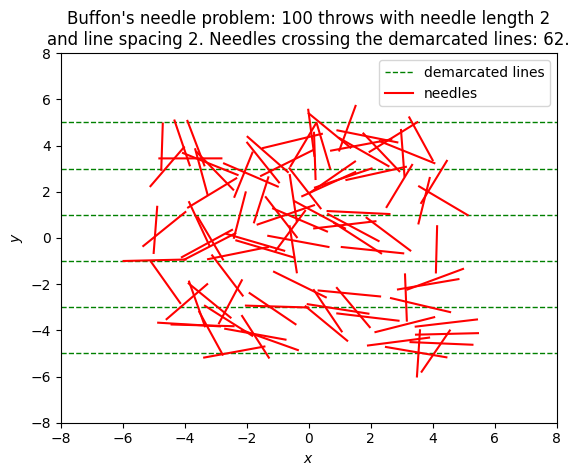

In [188]:
import matplotlib.pyplot as plt
from numpy import cos, sin, pi
from numpy.random import uniform


def display_buffon_needles(throws=50, needle_length=2,
                           line_spacing=2, grid_lines=6) -> None:
    """
    Display the results of several trials of Buffon's needle problem.
    Parameters:
        * The number of throws.
        * The length of the needle.
        * The spacing between demarcated lines.
        * The number of grid (demarcated) lines to be displayed.
    """
    # Set up the figure:
    plt.xlim(-grid_lines * line_spacing / 2 - needle_length,
             grid_lines * line_spacing / 2 + needle_length)
    plt.ylim(-grid_lines * line_spacing / 2 - needle_length,
             grid_lines * line_spacing / 2 + needle_length)
    grid_line_coordinates = []
    # Draw the horizontal grid lines and vertical auxiliary lines:
    for i in range(0, grid_lines):
        grid_line_coordinate = (-(grid_lines - 1) * line_spacing / 2 
                    + i * line_spacing)
        grid_line_coordinates.append(grid_line_coordinate)
        plt.axhline(y = grid_line_coordinate, linewidth=1,
                    color="green", linestyle='--',
                    label="demarcated lines" if i == 0 else "")
    count = 0    # Number of needles crossing the demarcated lines.
    for _ in range(throws):
        # Choose the angle between the needle and the lines (0 <= angle <= pi):
        angle = uniform(0, pi)
        # Choose the position of the needle's center and compute its endpoints:
        x_center, y_center = uniform(-(grid_lines - 1) * line_spacing / 2,
                                      (grid_lines - 1) * line_spacing / 2,
                                      size=2)
        x1 = x_center - (needle_length / 2) * cos(angle)
        y1 = y_center - (needle_length / 2) * sin(angle)
        x2 = x_center + (needle_length / 2) * cos(angle)
        y2 = y_center + (needle_length / 2) * sin(angle)
        # Draw the needle:
        plt.plot([x1, x2], [y1, y2], color='red', linewidth=1.5,
                 label="needles" if _ == 0 else "")
        lines_in_between = [y for y in grid_line_coordinates if y1 < y < y2]
        if lines_in_between:
            count += 1
    
    plt.title(f"Buffon's needle problem: {throws} throws with needle length "
              f"{needle_length}\nand line spacing {line_spacing}. Needles "
              f"crossing the demarcated lines: {count}.")
    plt.xlabel("$ x $")
    plt.ylabel("$ y $")
    plt.legend()
    plt.show()

# Example usage
display_buffon_needles(throws=100, needle_length=2,
                       line_spacing=2, grid_lines=6)
